In [1]:
# This code downloads a dataset from Kaggle about obesity prediction
# Este código descarga un conjunto de datos de Kaggle sobre la predicción de obesidad

!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Link to the Kaggle dataset
# Enlace al conjunto de datos de Kaggle
dataset_link = "https://www.kaggle.com/datasets/mrsimple07/obesity-prediction"
od.download(dataset_link)

# Change to the directory where the data was downloaded
# Cambiar al directorio donde se descargaron los datos
os.chdir("obesity-prediction")
os.listdir()

# Load the data into a pandas DataFrame
# Cargar los datos en un DataFrame de pandas
archivo = "obesity_data.csv"
df = pd.read_csv(archivo)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: freddygo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction


100%|██████████| 32.0k/32.0k [00:00<00:00, 19.7MB/s]

*   Age: The age of the individual, expressed in years.

*   Gender: The gender of the individual, categorized as male or female.

*   Height: The height of the individual, typically measured in centimeters or inches.

*   Weight: The weight of the individual, typically measured in kilograms or pounds.

*   BMI: A calculated metric derived from the individual's weight and height

*   PhysicalActivityLevel: This variable quantifies the individual's level of physical activity

*   ObesityCategory: Categorization of individuals based on their BMI into different obesity categories





In [3]:
# This code prints the number of rows and columns in the DataFrame
# Este código imprime la cantidad de filas y columnas en el DataFrame
print("El data set tiene {} filas y {} columnas :)".format(df.shape[0], df.shape[1]))
df.head(4)

El data set tiene 1000 filas y 7 columnas :)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight


In [4]:
# Check and display the number of missing values in each column of the DataFrame.
# Verifica y muestra la cantidad de valores faltantes en cada columna del DataFrame.
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


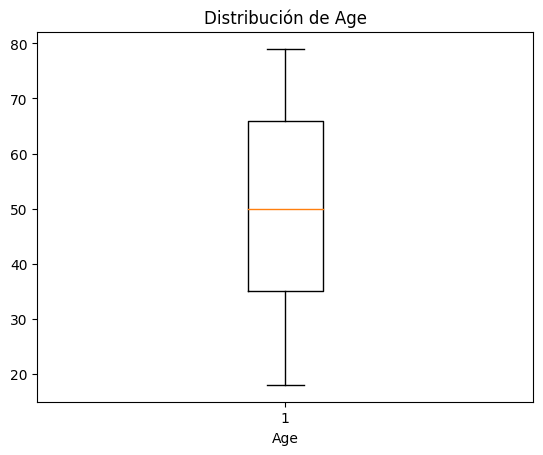

In [5]:
# Create a boxplot to visualize the distribution of the 'Age' column.
# Crea un diagrama de caja para visualizar la distribución de la columna 'Age'.
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.title('Distribución de Age')
plt.show()

In [6]:
# Generate descriptive statistics for the 'Age' column, including count, mean, std, etc.
# Genera estadísticas descriptivas para la columna 'Age', incluyendo cuenta, media, desviación estándar, etc.
df['Age'].describe()

,Age
count,1000.000000
mean,49.857000
std,18.114267
min,18.000000
25%,35.000000
50%,50.000000
75%,66.000000
max,79.000000


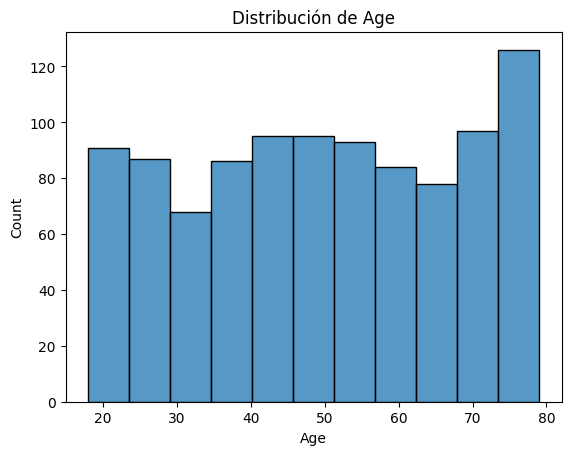

In [7]:
# Create a histogram to visualize the distribution of the 'Age' column.
# Crea un histograma para visualizar la distribución de la columna 'Age'.
sns.histplot(df['Age'])
plt.xlabel('Age')
plt.title('Distribución de Age')
plt.show()

## Fin de Age

Gender
Male      523
Female    477
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribución de Gender')

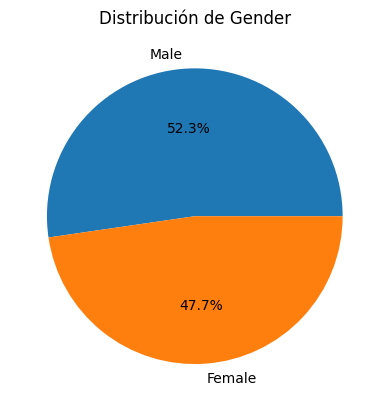

In [8]:
# Display the count of each category in the 'Gender' column and create a pie chart for visual distribution.
# Muestra la cantidad de cada categoría en la columna 'Gender' y crea un gráfico circular para la distribución visual.
print(df['Gender'].value_counts())
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de Gender')

In [10]:
# Encode the 'Gender' column into numerical values using Label Encoding.
# Codifica la columna 'Gender' en valores numéricos utilizando Codificación de Etiquetas.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [11]:
# Display the first four rows of the modified DataFrame to check changes.
# Muestra las primeras cuatro filas del DataFrame modificado para verificar cambios.
df.head(4)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,Normal weight
1,69,1,164.127306,89.959256,33.395209,2,Obese
2,46,0,168.072202,72.930629,25.817737,4,Overweight
3,32,1,168.459633,84.886912,29.912247,3,Overweight


## Fin de Gender

In [12]:
# Generate descriptive statistics for the 'Height' column, including count, mean, std, etc.
# Genera estadísticas descriptivas para la columna 'Height', incluyendo cuenta, media, desviación estándar, etc.
df['Height'].describe()

,Height
count,1000.000000
mean,170.052417
std,10.309971
min,136.115719
25%,163.514205
50%,169.801665
75%,177.353596
max,201.419670


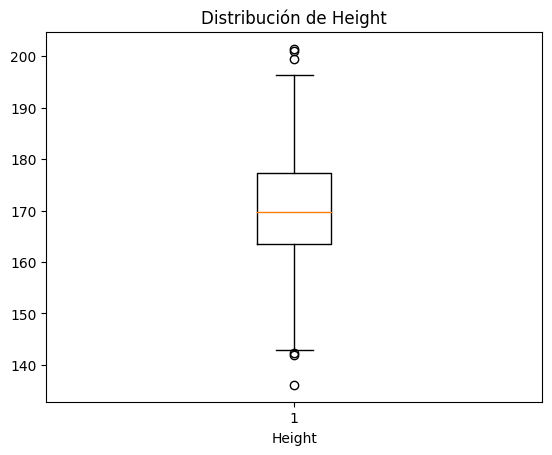

In [13]:
# Create a boxplot to visualize the distribution of the 'Height' column.
# Crea un diagrama de caja para visualizar la distribución de la columna 'Height'.
plt.boxplot(df['Height'])
plt.xlabel('Height')
plt.title('Distribución de Height')
plt.show()

In [14]:
# Calculate the first (Q1) and third (Q3) quartiles for the 'Height' column, compute the interquartile range (IQR),
# and determine the lower and upper limits for identifying potential outliers.
# Calcula el primer (Q1) y el tercer (Q3) cuartil para la columna 'Height', calcula el rango intercuartílico (IQR),
# y determina los límites inferior y superior para identificar posibles valores atípicos.
Q1_Height = df['Height'].quantile(0.25)
Q3_Height = df['Height'].quantile(0.75)

IQR_Height = Q3_Height - Q1_Height

limite_inferior_Height = Q1_Height - 1.5 * IQR_Height
limite_superior_Height = Q3_Height + 1.5 * IQR_Height

In [15]:
# Filter the DataFrame to identify and display the rows where 'Height' values are considered outliers.
# Filtra el DataFrame para identificar y mostrar las filas donde los valores de 'Height' se consideran atípicos.
df[(df['Height'] < limite_inferior_Height) | (df['Height'] > limite_superior_Height)]

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
231,75,0,200.940490,72.844422,18.041032,4,Underweight
245,58,1,199.462128,64.599518,16.237097,4,Underweight
368,79,1,201.419670,34.365010,8.470572,1,Underweight
529,62,1,136.115719,85.166147,45.967452,2,Obese
757,40,1,141.937829,59.897897,29.731393,1,Overweight
852,62,0,142.404026,64.667641,31.889116,2,Obese


In [16]:
# Cap the 'Height' values at the lower and upper limits to handle outliers by replacing them with the respective limits.
# Limita los valores de 'Height' en los límites inferior y superior para manejar los valores atípicos, reemplazándolos con los límites respectivos.
df.loc[df['Height'] < limite_inferior_Height, 'Height'] = limite_inferior_Height
df.loc[df['Height'] > limite_superior_Height, 'Height'] = limite_superior_Height

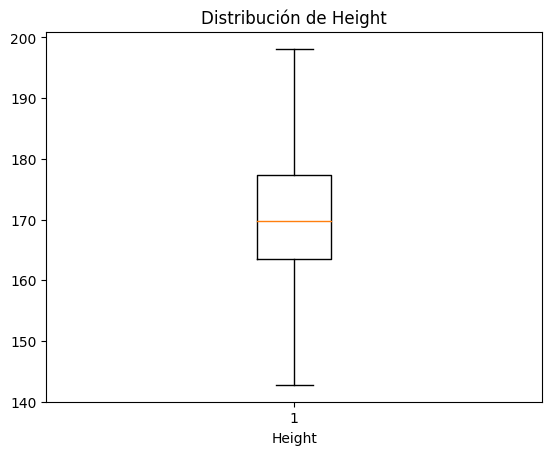

In [17]:
# Create a boxplot to visualize the distribution of the 'Height' column after outlier handling.
# Crea un diagrama de caja para visualizar la distribución de la columna 'Height' después de manejar los valores atípicos.
plt.boxplot(df['Height'])
plt.xlabel('Height')
plt.title('Distribución de Height')
plt.show()

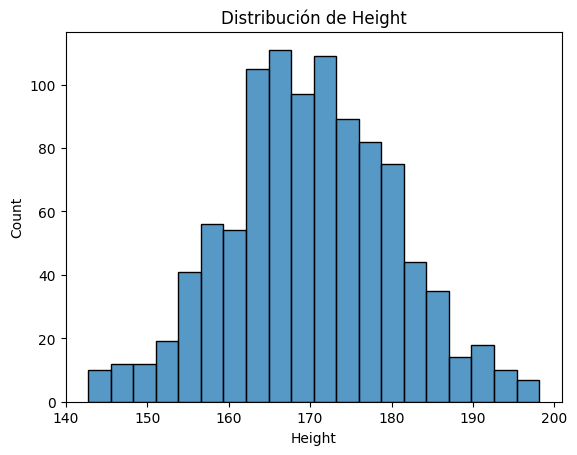

In [18]:
# Create a histogram to visualize the distribution of the 'Height' column.
# Crea un histograma para visualizar la distribución de la columna 'Height'.
sns.histplot(df['Height'])
plt.xlabel('Height')
plt.title('Distribución de Height')
plt.show()

## Fin de Height

In [19]:
# Generate descriptive statistics for the 'Weight' column, including count, mean, standard deviation, minimum, and quartiles.
# Genera estadísticas descriptivas para la columna 'Weight', incluyendo cuenta, media, desviación estándar, mínimo y cuartiles.
df['Weight'].describe()

,Weight
count,1000.000000
mean,71.205769
std,15.509849
min,26.065730
25%,61.129629
50%,71.929072
75%,81.133746
max,118.907366


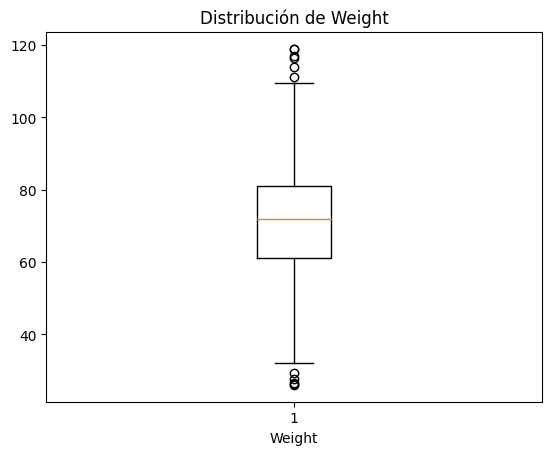

In [20]:
# Create a boxplot to visualize the distribution of the 'Weight' column and identify potential outliers.
# Crea un diagrama de caja para visualizar la distribución de la columna 'Weight' e identificar posibles valores atípicos.
plt.boxplot(df['Weight'])
plt.xlabel('Weight')
plt.title('Distribución de Weight')
plt.show()

In [21]:
# Calculate the first (Q1) and third (Q3) quartiles for the 'Weight' column, compute the interquartile range (IQR),
# and determine the lower and upper limits for identifying potential outliers.
# Calcula el primer (Q1) y el tercer (Q3) cuartil para la columna 'Weight', calcula el rango intercuartílico (IQR),
# y determina los límites inferior y superior para identificar posibles valores atípicos.
Q1_Weight = df['Weight'].quantile(0.25)
Q3_Weight = df['Weight'].quantile(0.75)

IQR_Weight = Q3_Weight - Q1_Weight

limite_inferior_Weight = Q1_Weight - 1.5 * IQR_Weight
limite_superior_Weight = Q3_Weight + 1.5 * IQR_Weight

In [22]:
# Filter the DataFrame to identify and display the rows where 'Weight' values are considered outliers.
# Filtra el DataFrame para identificar y mostrar las filas donde los valores de 'Weight' se consideran atípicos.
df[(df['Weight'] < limite_inferior_Weight) | (df['Weight'] > limite_superior_Weight)]

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
61,35,1,181.941820,116.307327,35.135166,3,Obese
134,26,1,152.949133,118.819709,50.791898,2,Obese
412,58,1,159.406079,26.477145,10.419848,2,Underweight
519,52,1,171.202256,113.850334,38.843230,4,Obese
614,65,1,168.769861,27.701036,9.725372,2,Underweight
650,65,0,172.105700,118.907366,40.143779,2,Obese
655,79,1,166.398064,29.472473,10.644372,3,Underweight
759,49,1,168.971645,116.828453,40.918619,2,Obese
773,37,1,172.452778,26.294913,8.841610,3,Underweight
793,36,0,193.555803,111.251608,29.695723,2,Overweight


In [23]:
# Cap the 'Weight' values at the lower and upper limits to handle outliers by replacing them with the respective limits.
# Limita los valores de 'Weight' en los límites inferior y superior para manejar los valores atípicos, reemplazándolos con los límites respectivos.
df.loc[df['Weight'] < limite_inferior_Weight, 'Weight'] = limite_inferior_Weight
df.loc[df['Weight'] > limite_superior_Weight, 'Weight'] = limite_superior_Weight

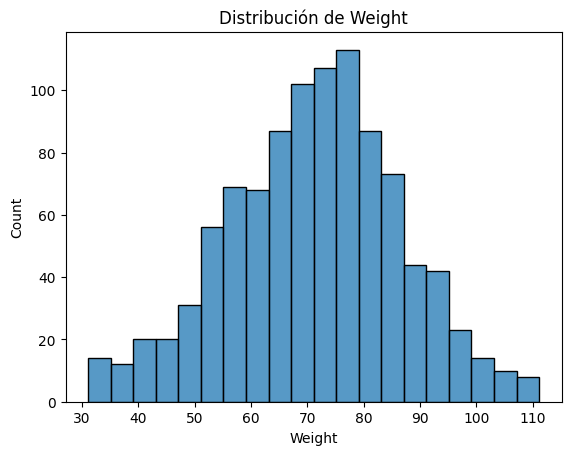

In [24]:
# Create a histogram to visualize the distribution of the 'Weight' column after handling outliers.
# Crea un histograma para visualizar la distribución de la columna 'Weight' después de manejar los valores atípicos.
sns.histplot(df['Weight'])
plt.xlabel('Weight')
plt.title('Distribución de Weight')
plt.show()

## Fin de Weight

In [25]:
# This code provides a statistical summary of the 'BMI' column in the DataFrame, including count, mean, std, min, 25%, 50%, 75%, and max values.
# Este código proporciona un resumen estadístico de la columna 'BMI' en el DataFrame, incluyendo conteo, media, desviación estándar, mínimo, 25%, 50%, 75% y valores máximos.
df['BMI'].describe()

,BMI
count,1000.000000
mean,24.888317
std,6.193912
min,8.470572
25%,20.918068
50%,24.698647
75%,28.732132
max,50.791898


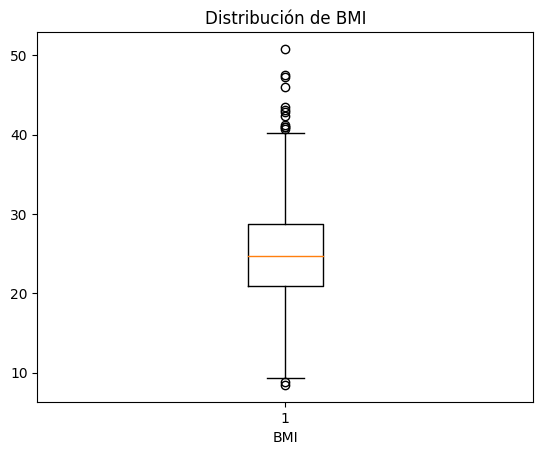

In [26]:
# This code creates and displays a box plot for the 'BMI' column, labeling the x-axis and setting the title to 'BMI Distribution'.
# Este código crea y muestra un diagrama de caja para la columna 'BMI', etiquetando el eje x y estableciendo el título como 'Distribución de BMI'.
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.title('Distribución de BMI')
plt.show()

In [27]:
# This code calculates the first (Q1) and third (Q3) quartiles of the 'BMI' column, computes the interquartile range (IQR),
# and determines the lower and upper limits for identifying outliers in the 'BMI' data.
# Este código calcula el primer (Q1) y tercer (Q3) cuartil de la columna 'BMI', computa el rango intercuartílico (IQR)
# y determina los límites inferior y superior para identificar valores atípicos en los datos de 'BMI'.
Q1_BMI = df['BMI'].quantile(0.25)
Q3_BMI = df['BMI'].quantile(0.75)

IQR_BMI = Q3_BMI - Q1_BMI

limite_inferior_BMI = Q1_BMI - 1.5 * IQR_BMI
limite_superior_BMI = Q3_BMI + 1.5 * IQR_BMI

In [28]:
# Este código filtra el DataFrame para encontrar los valores de 'BMI' que están por debajo del límite inferior o por encima del límite superior, identificando así los valores atípicos.
# This code filters the DataFrame to find 'BMI' values that are either below the lower limit or above the upper limit, thus identifying outliers.
df[(df['BMI'] < limite_inferior_BMI) | (df['BMI'] > limite_superior_BMI)]

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
22,19,1,143.527471,83.796214,40.677507,2,Obese
37,66,0,149.147824,95.299588,42.840761,4,Obese
134,26,1,152.949133,111.139921,50.791898,2,Obese
263,49,1,146.753207,91.255657,42.372549,2,Obese
311,22,0,145.448750,99.868789,47.207369,2,Obese
368,79,1,198.112682,34.365010,8.470572,1,Underweight
507,34,0,145.314571,87.116991,41.255755,2,Obese
529,62,1,142.755118,85.166147,45.967452,2,Obese
591,73,1,157.617043,107.856997,43.415217,2,Obese
604,70,0,145.682864,91.366930,43.049894,4,Obese


In [29]:
# Este código ajusta los valores de 'BMI' para que no sean menores que el límite inferior ni mayores que el límite superior.
# This code adjusts the 'BMI' values to ensure they are not below the lower limit or above the upper limit.
df.loc[df['BMI'] < limite_inferior_BMI, 'BMI'] = limite_inferior_BMI
df.loc[df['BMI'] > limite_superior_BMI, 'BMI'] = limite_superior_BMI

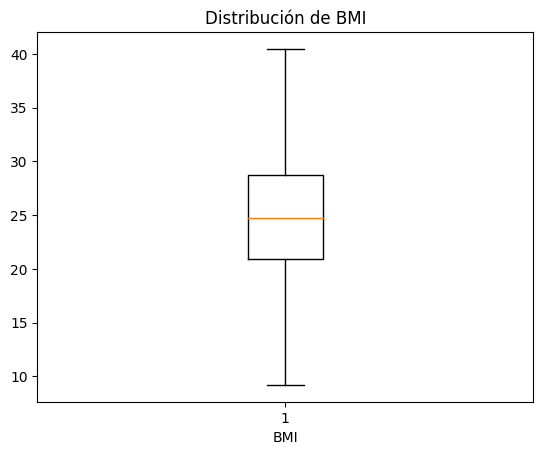

In [30]:
# Este código crea un diagrama de caja para visualizar la distribución de los valores de 'BMI', añadiendo etiquetas y un título al gráfico.
# This code creates a box plot to visualize the distribution of 'BMI' values, adding labels and a title to the plot.
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.title('Distribución de BMI')
plt.show()

## Fin de BMI

PhysicalActivityLevel
4    259
3    255
2    247
1    239
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribución de PhysicalActivityLevel')

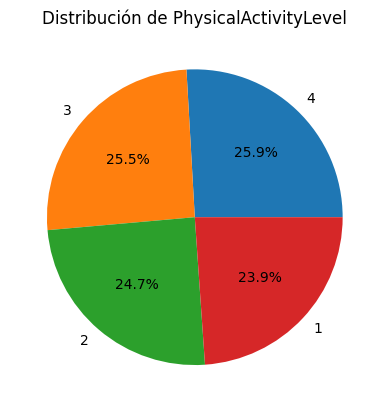

In [31]:
# Este código imprime la cuenta de cada nivel de actividad física en el DataFrame y luego crea un gráfico de pastel para mostrar la distribución porcentual de esos niveles.
# This code prints the count of each physical activity level in the DataFrame and then creates a pie chart to show the percentage distribution of those levels.
print(df['PhysicalActivityLevel'].value_counts())
plt.pie(df['PhysicalActivityLevel'].value_counts(), labels=df['PhysicalActivityLevel'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de PhysicalActivityLevel')

## Fin de PhysicalActivityLevel

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribución de ObesityCategory')

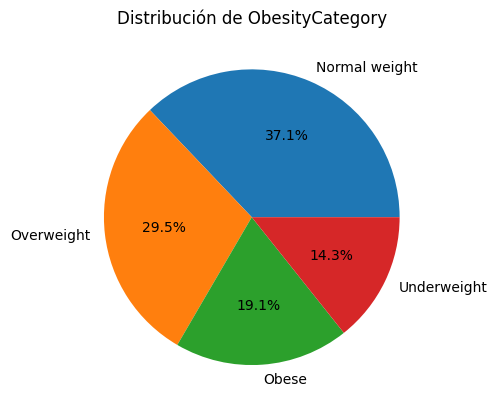

In [32]:
# Este código imprime la cuenta de cada categoría de obesidad en el DataFrame y luego crea un gráfico de pastel para mostrar la distribución porcentual de esas categorías.
# This code prints the count of each obesity category in the DataFrame and then creates a pie chart to show the percentage distribution of those categories.
print(df['ObesityCategory'].value_counts())
plt.pie(df['ObesityCategory'].value_counts(), labels=df['ObesityCategory'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de ObesityCategory')

In [33]:
# Este código utiliza el codificador de etiquetas para transformar las categorías de obesidad en valores numéricos, facilitando su uso en modelos de machine learning.
# This code uses the LabelEncoder to transform obesity categories into numerical values, making them easier to use in machine learning models.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ObesityCategory'] = label_encoder.fit_transform(df['ObesityCategory'])

In [34]:
# Este código muestra las primeras cuatro filas del DataFrame, lo que permite obtener una vista rápida de los datos y su estructura.
# This code displays the first four rows of the DataFrame, providing a quick overview of the data and its structure.
df.head(4)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2


In [35]:
# Este código importa las bibliotecas necesarias para realizar una regresión lineal, dividir los datos en conjuntos de entrenamiento y prueba, y evaluar el rendimiento del modelo.
# This code imports the necessary libraries to perform linear regression, split the data into training and testing sets, and evaluate the model's performance.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

In [36]:
# Este código separa las características (X) de la variable objetivo (y) en el DataFrame, eliminando la columna 'ObesityCategory' de X y asignándola a y.
# This code separates the features (X) from the target variable (y) in the DataFrame by dropping the 'ObesityCategory' column from X and assigning it to y.
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ObesityCategory'])
y = df['ObesityCategory']

In [37]:
# Este código divide los datos en conjuntos de entrenamiento y prueba, utilizando el 70% de los datos para entrenar el modelo y el 30% para probarlo, asegurando la reproducibilidad con un estado aleatorio fijo.
# This code splits the data into training and testing sets, using 70% of the data to train the model and 30% to test it, ensuring reproducibility with a fixed random state.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=.7, random_state=1)

In [38]:
# Este código crea un modelo de regresión lineal con la opción de ajustar la intersección y luego entrena el modelo utilizando los datos de entrenamiento.
# This code creates a linear regression model with the option to fit the intercept and then trains the model using the training data.
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
# Este código imprime los coeficientes del modelo de regresión lineal, que representan la relación entre cada característica y la variable objetivo, así como la ordenada al origen, que es el valor de la variable objetivo cuando todas las características son cero.
# This code prints the coefficients of the linear regression model, which represent the relationship between each feature and the target variable, as well as the intercept, which is the value of the target variable when all features are zero.
print("Coeficientes: ", model.coef_)
print("Ordenada al origen: ", model.intercept_)

Coeficientes:  [-0.00038348 -0.0701682   0.04318167 -0.06231029  0.14214287  0.01685429]
Ordenada al origen:  -5.175216672976408


In [40]:
# Este código utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba, generando así las predicciones de la variable objetivo basadas en las características del conjunto de prueba.
# This code uses the trained model to make predictions on the test set, thereby generating predictions for the target variable based on the features of the test set.
y_pred = model.predict(X_test)

In [41]:
# Este código calcula el error cuadrático medio (MSE) entre las predicciones realizadas por el modelo y los valores reales del conjunto de prueba, y luego imprime el resultado. El MSE es una medida comúnmente utilizada para evaluar la precisión de un modelo de regresión.
# This code calculates the mean squared error (MSE) between the predictions made by the model and the actual values from the test set, and then prints the result. The MSE is a commonly used metric to evaluate the accuracy of a regression model.
mse = mean_squared_error(y_pred, Y_test)
print("MSE: ", mse)

MSE:  1.1353826760486578


In [42]:
# Este código calcula el coeficiente de determinación R², que mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Luego imprime el resultado. Un valor de R² cercano a 1 indica un buen ajuste del modelo.
# This code calculates the R² score, which measures the proportion of variance in the dependent variable that can be predicted from the independent variables. It then prints the result. An R² value close to 1 indicates a good fit of the model.
r2 = r2_score(y_pred, Y_test)
print("R²: ", r2)

R²:  -20.002197759429134


In [43]:
# Este código importa la clase RandomForestRegressor de la biblioteca scikit-learn, que se utiliza para crear un modelo de regresión basado en el algoritmo de bosques aleatorios. Este modelo es útil para realizar predicciones en problemas de regresión.
# This code imports the RandomForestRegressor class from the scikit-learn library, which is used to create a regression model based on the random forest algorithm. This model is useful for making predictions in regression problems.
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Este código crea una instancia del modelo RandomForestRegressor con 34 árboles (n_estimators), una profundidad máxima de 15 (max_depth), un estado aleatorio fijo para reproducibilidad (random_state=42) y un mínimo de 25 muestras requeridas para dividir un nodo (min_samples_split). Luego, ajusta el modelo a los datos de entrenamiento (X_train, Y_train) y finalmente imprime las predicciones realizadas sobre el conjunto de prueba (X_test). También calcula y devuelve la puntuación del modelo en el conjunto de prueba, que indica su rendimiento.
# This code creates an instance of the RandomForestRegressor model with 34 trees (n_estimators), a maximum depth of 15 (max_depth), a fixed random state for reproducibility (random_state=42), and a minimum of 25 samples required to split an internal node (min_samples_split). It then fits the model to the training data (X_train, Y_train) and finally prints the predictions made on the test set (X_test). It also calculates and returns the model's score on the test set, which indicates its performance.
rfc = RandomForestRegressor(n_estimators=34, max_depth=15, random_state=42, min_samples_split=25)
rfc.fit(X_train, Y_train)
print(rfc.predict(X_test))
rfc.score(X_test, Y_test)

[1.         0.         0.         3.         0.         0.
 0.         0.         0.         0.         0.         2.
 0.         1.         0.         2.         0.         2.
 2.         1.         0.         0.         2.         0.
 2.         2.         0.         0.         0.         0.
 0.         0.         0.         2.         1.         0.
 0.         2.         2.         3.         3.         3.
 3.         0.         0.         3.         0.         2.
 1.         2.         1.52941176 2.         0.         0.
 1.         2.         3.         2.         2.         0.
 0.         3.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.         0.         0.         2.
 1.         3.         1.         1.         2.         2.
 0.         2.         1.         1.         1.         0.
 0.         0.         2.         2.         0.         0.
 1.         3.         0.         2.         2.         

0.9831425697652346